In [2]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime

In [3]:
tickers = ['MMM', 'XOM', 'MCD', 'AA', 'GE', 'MRK', 'MO', 'GM', 'MSFT', 'AXP', 'HPQ', 'PFE', 'AIG', 'HD', 'PG', 'BA', 'HON', 'T', 'CAT', 'INTC', 'UTX', 'C', 'IBM', 'VZ', 'KO', 'JNJ', 'WMT', 'DWDP', 'JPM', 'DIS', 'BAC', 'CVX', 'KHC', 'CSCO', 'TRV', 'UNH', 'GS', 'NKE', 'V', 'AAPL', 'WBA']
d = {}
#for name in tickers:
#    d[name] = web.get_data_yahoo(name,'01/01/2004',interval='m')
#for i in range(0, 41):
    #d[i] = web.get_data_yahoo(tickers[i],'01/01/2004',interval='m')['Adj Close']

In [4]:
ddd = {}
for i in range(0, 41):
    ddd[i] = web.get_data_yahoo(tickers[i],'12/01/2013')['Adj Close']

In [772]:
index = 0
for i in tickers:
    if i == 'HON':
        print (index)
    index +=1

16


In [791]:
a

,Adj Close
Date,
2013-12-02,50.089317
2013-12-03,49.622890
2013-12-04,49.537216
2013-12-05,48.604347
2013-12-06,49.013664
2013-12-09,49.603848
2013-12-10,49.251648
2013-12-11,48.271179
2013-12-12,48.461552


In [21]:
a = pd.DataFrame(ddd[3])
a.loc[a.index == '2018-12-3']


,Adj Close
Date,
2018-12-03,32.049999


In [34]:
# 독립변수들 전처리
dollar = pd.read_csv('C:/Users/Yumi/Desktop/study/4-1/finance/final/independent/dollarindex.csv', encoding = "ISO-8859-1", index_col = 0)
federal = pd.read_csv('C:/Users/Yumi/Desktop/study/4-1/finance/final/independent/federal.csv', encoding = "ISO-8859-1", index_col = 0)
pmi = pd.read_csv('C:/Users/Yumi/Desktop/study/4-1/finance/final/independent/pmi.csv', encoding = "ISO-8859-1", index_col = 0)
primerate = pd.read_csv('C:/Users/Yumi/Desktop/study/4-1/finance/final/independent/primerate.csv', encoding = "ISO-8859-1", index_col = 0)
trend = pd.read_csv('C:/Users/Yumi/Desktop/study/4-1/finance/final/independent/trend.csv', encoding = "ISO-8859-1", index_col = 0)
unrate = pd.read_csv('C:/Users/Yumi/Desktop/study/4-1/finance/final/independent/unrate.csv', encoding = "ISO-8859-1", index_col = 0)

In [35]:
for i in tickers:
    trend[[i]] = trend[[i]].shift(1)

In [36]:
# 독립변수 timelag 추가
dollar.TWEXBMTH = dollar.TWEXBMTH.shift(1)
federal.MTSDS133FMS = federal.MTSDS133FMS.shift(1)
pmi.PMI = pmi.PMI.shift(1)
primerate.MPRIME = primerate.MPRIME.shift(1)
unrate.UNRATE = unrate.UNRATE.shift(1)

In [37]:
dollar.rename(columns={'TWEXBMTH': 'data'}, inplace=True)
federal.rename(columns={'MTSDS133FMS': 'data'}, inplace=True)
pmi.rename(columns={'PMI': 'data'}, inplace=True)
pmi.rename(columns={'Date': 'DATE'}, inplace=True)

primerate.rename(columns={'MPRIME': 'data'}, inplace=True)
unrate.rename(columns={'UNRATE': 'data'}, inplace=True)
trend.rename(columns={'Date': 'DATE'}, inplace=True)

In [38]:
unrate.index = pd.to_datetime(unrate.index)
federal.index = pd.to_datetime(federal.index)
dollar.index = pd.to_datetime(dollar.index)
pmi.index = pd.to_datetime(pmi.index)
primerate.index = pd.to_datetime(primerate.index)
trend.index = pd.to_datetime(trend.index)

In [8]:
# 독립변수들 시각화 -> plotly 웹사이트에 저장

import plotly
plotly.tools.set_credentials_file(username='le52ny98', api_key='1hXUMqn5YXIjrM1NNTil')
#import plotly.plotly as ply
import pandas as pd 
import numpy as np 
from plotly import __version__ 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print (__version__)
import cufflinks as cf
import plotly.graph_objs as go
init_notebook_mode(connected=True)

3.4.2


In [39]:
#결측치 제거

unrate = unrate.dropna()
federal = federal.dropna()
dollar = dollar.dropna()
pmi = pmi.dropna()
primerate = primerate.dropna()
trend = trend.dropna()

In [737]:
# Dividing the dataset

federal_test1 = federal.loc['2007-02-01':'2018-11-01']
unrate_test1 = unrate.loc['2007-02-01':'2018-11-01']
dollar_test1 = dollar.loc['2007-02-01':'2018-11-01']
pmi_test1 = pmi.loc['2007-02-01':'2018-11-01']
primerate_test1 = primerate.loc['2007-02-01':'2018-11-01']
trend_test1 = trend.loc['2007-02-01':'2018-11-01']

In [11]:
from pyramid.arima import auto_arima

c:\users\yumi\miniconda3\envs\python3\lib\site-packages\pyramid\__init__.py:68: UserWarning:


    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    



In [126]:
trend_list = []
for column in trend:
    temp = auto_arima(trend[column], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
    trend_list.append(temp)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=866.235, BIC=881.764, Fit time=3.274 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=986.669, BIC=992.881, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=936.644, BIC=949.068, Fit time=0.642 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=864.247, BIC=876.671, Fit time=2.293 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=866.145, BIC=881.675, Fit time=3.942 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=933.125, BIC=942.443, Fit time=0.198 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=866.110, BIC=881.640, Fit time=8.920 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=866.450, BIC=885.086, Fit time=9.699 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=934.376, BIC=943.694, Fit time=1.206 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 

Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=952.190, BIC=970.825, Fit time=2.104 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=967.125, BIC=976.443, Fit time=0.442 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=949.152, BIC=970.893, Fit time=3.751 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=951.130, BIC=975.977, Fit time=4.592 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=1006.894, BIC=1025.530, Fit time=0.964 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 2, 12); AIC=951.138, BIC=975.986, Fit time=8.160 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 2, 12); AIC=952.057, BIC=980.010, Fit time=10.163 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 1, 12); AIC=949.112, BIC=973.960, Fit time=3.387 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 1, 1, 1

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=838.076, BIC=853.605, Fit time=2.470 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 2, 12); AIC=812.066, BIC=840.020, Fit time=13.815 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=809.958, BIC=828.594, Fit time=5.361 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=812.364, BIC=827.894, Fit time=2.374 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=811.738, BIC=833.480, Fit time=5.237 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 2, 12); AIC=824.499, BIC=840.028, Fit time=1.964 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 2, 12); AIC=811.653, BIC=833.394, Fit time=5.517 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 2, 12); AIC=836.739, BIC=849.163, Fit time=1.995 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 2, 12); AIC=810.656, BIC=835.504, Fit time=14.092 seconds
Total fit time: 82.420 seconds
Fit ARIMA: or

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=760.550, BIC=779.185, Fit time=4.382 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=762.747, BIC=784.489, Fit time=4.631 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=760.514, BIC=779.150, Fit time=1.780 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=763.056, BIC=775.480, Fit time=0.671 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=760.561, BIC=779.197, Fit time=1.709 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=767.826, BIC=777.144, Fit time=0.374 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=762.460, BIC=784.202, Fit time=2.600 seconds
Total fit time: 20.982 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1095.423, BIC=1110.952, Fit time=2.132 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1193.616, BIC=1199.828, Fit time=0.045 seconds
Fit ARIMA: 

Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=936.173, BIC=951.703, Fit time=1.701 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 15.889 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=955.232, BIC=970.762, Fit time=1.292 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1056.816, BIC=1063.028, Fit time=0.047 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=972.739, BIC=985.163, Fit time=0.710 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=953.878, BIC=966.302, Fit time=0.974 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=955.149, BIC=970.678, Fit time=1.089 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1019.758, BIC=1029.076, Fit time=0.172 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=955.192, BIC=970.721, Fit time=2.478 seconds
Fit ARIMA: order=(0, 

Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=969.072, BIC=981.496, Fit time=0.783 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=929.729, BIC=942.152, Fit time=0.929 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=928.053, BIC=946.689, Fit time=3.364 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=994.986, BIC=1007.410, Fit time=0.638 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=928.035, BIC=946.671, Fit time=5.971 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=928.944, BIC=950.686, Fit time=8.984 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=928.637, BIC=947.273, Fit time=2.653 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=930.006, BIC=942.430, Fit time=0.756 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=928.653, BIC=947.289, Fit time=4.134 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0,

Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1169.322, BIC=1181.745, Fit time=0.755 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1103.564, BIC=1115.987, Fit time=2.448 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1105.142, BIC=1120.671, Fit time=4.527 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1177.891, BIC=1187.209, Fit time=0.269 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1105.059, BIC=1120.589, Fit time=7.817 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1106.330, BIC=1124.965, Fit time=8.925 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1160.841, BIC=1170.159, Fit time=1.210 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=1104.965, BIC=1120.494, Fit time=2.684 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=1106.832, BIC=1125.467, Fit time=3.708 seconds
Total fit time: 37.239 secon

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=838.347, BIC=853.877, Fit time=1.611 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=944.595, BIC=950.807, Fit time=0.042 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=886.034, BIC=898.458, Fit time=0.639 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=836.979, BIC=849.403, Fit time=0.957 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=835.949, BIC=851.479, Fit time=3.411 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=866.402, BIC=878.826, Fit time=0.533 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=837.945, BIC=856.581, Fit time=11.325 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=892.387, BIC=901.705, Fit time=0.195 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=836.047, BIC=857.788, Fit time=9.883 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1,

Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1025.180, BIC=1037.603, Fit time=0.783 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=994.315, BIC=1006.739, Fit time=0.786 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=993.560, BIC=1012.196, Fit time=2.017 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1028.150, BIC=1040.574, Fit time=0.414 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=993.642, BIC=1012.278, Fit time=4.429 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=995.411, BIC=1017.153, Fit time=11.166 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1014.631, BIC=1027.055, Fit time=0.690 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=994.205, BIC=1012.841, Fit time=1.863 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0

In [124]:
model_federal1 = auto_arima(federal, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
model_unrate1 = auto_arima(unrate, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
model_dollar1 = auto_arima(dollar, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
model_pmi1 = auto_arima(pmi, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
model_primerate1 = auto_arima(primerate, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4003.199, BIC=4018.699, Fit time=0.622 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4141.068, BIC=4147.268, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4070.826, BIC=4083.225, Fit time=0.379 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=4001.626, BIC=4020.225, Fit time=1.188 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=4004.115, BIC=4019.614, Fit time=0.719 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=4000.476, BIC=4022.175, Fit time=3.318 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3977.010, BIC=4001.809, Fit time=3.968 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 2, 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=768.024, BIC=780.423, Fit time=0.322 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=681.734, BIC=700.333, Fit time=9.793 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=683.594, BIC=705.293, Fit time=10.175 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=679.355, BIC=697.954, Fit time=4.563 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=677.644, BIC=693.144, Fit time=2.356 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=680.361, BIC=702.060, Fit time=5.597 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=679.369, BIC=697.968, Fit time=4.721 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=766.412, BIC=778.812, Fit time=0.238 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 2, 12); AIC=679.352, BIC=697.951, Fit time=9.429 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1,

In [738]:
# Model Fit

model_federal1.fit(federal_test1)
model_unrate1.fit(unrate_test1)
model_dollar1.fit(dollar_test1)
model_pmi1.fit(pmi_test1)
#model_primerate1.fit(primerate_test1)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [636]:
data_list = []
for column in trend:
    data_list.append(trend[column])

                      

In [637]:
for i in range(0, 41):
    trend_list[i].fit(data_list[i])

In [739]:
forecast_federal1 = model_federal1.predict(n_periods = 12)
forecast_unrate1 = model_unrate1.predict(n_periods = 12)
forecast_dollar1 = model_dollar1.predict(n_periods = 12)
forecast_pmi1 = model_pmi1.predict(n_periods = 12)
forecast_primerate1 = model_primerate1.predict(n_periods = 12)

In [740]:
forecast_trend1 = []
for i in range(41):
    forecast_trend1.append('x')
for i in range(0,41):
    forecast_trend1[i] = trend_list[i].predict(n_periods = 12)
    

In [741]:
# Model training
model_reg = {}
for i in range(0, 41):
    a = {'y':d[i].loc['2004-02-01':'2018-11-01'].values,'trend':trend[tickers[i]].loc['2004-02-01':'2018-11-01'].values, 'federal':federal.data.loc['2004-02-01':'2018-11-01'].values, 'unrate':unrate.data.loc['2004-02-01':'2018-11-01'].values, 'dollar':dollar.data.loc['2004-02-01':'2018-11-01'].values, 'pmi':pmi.data.loc['2004-02-01':'2018-11-01'].values}
    dataset = pd.DataFrame.from_dict(a, orient = 'index')
    dataset = dataset.T
    model_reg[i] = dataset

In [742]:
#forecast dataset
forecast_reg = {}
for i in range(0, 41):
    dataset = pd.DataFrame({'trend':forecast_trend1[i], 'federal':forecast_federal1, 'unrate': forecast_unrate1, 'dollar': forecast_dollar1, 'pmi':forecast_pmi1})
    forecast_reg[i] = dataset

In [754]:
import statsmodels.api as sm # import statsmodels 

ind = model_reg[0][['trend', 'federal','unrate','dollar','pmi']]
#가짜ind = ind.dropna()
de = model_reg[0]['y']#가짜[0:176]
model = sm.OLS(de, ind).fit()
forr = forecast_reg[0][['trend', 'federal','unrate','dollar','pmi']]
predictions = model.predict(forr)
model.rsquared_adj 

0.9659229861560374

In [756]:
prediction_1 = {}
for i in range(0, 41):
    ind = model_reg[i][['trend', 'federal','unrate','dollar','pmi']]
    #가짜 ind= ind.dropna()
    de = model_reg[i]['y']#가짜[0:176]
    model = sm.OLS(de, ind).fit()
    forr = forecast_reg[i][['trend', 'federal','unrate','dollar','pmi']]
    predictions = model.predict(forr)
    prediction_1[i] = predictions

In [757]:
sel = []
def geo_mean(iterable):
    global sel
    iterable = pd.DataFrame(iterable.values)
    mean1 = (iterable/iterable.shift(1))-1
    result = mean1.mean()*12 # 연율화
    result =result.tolist()
    sel.append(result[0])

In [758]:
for i in range(41):
    geo_mean(prediction_1[i])

In [759]:
index = 0
for i in sel:
    flag = math.isnan(i)
    if flag == True:
        sel[index] = 0
    index += 1

In [760]:
import math

In [761]:
_sel = sorted(sel, reverse=True)
c = []
for i in _sel[:5]:
    index = 0
    for j in sel:
        if i == j:
            c.append(tickers[index])
        index +=1

In [762]:
c

['HON', 'TRV', 'CAT', 'AAPL', 'AA']

In [763]:
temp = []
for i in c:
    index = 0
    for j in tickers:
        if i == j:
            temp.append(index)
        index += 1

In [764]:
temp

[16, 34, 18, 39, 3]

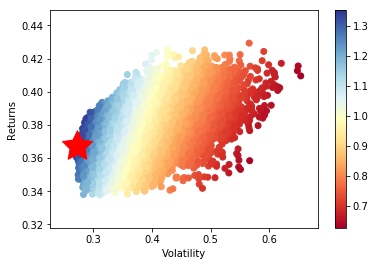

In [765]:
data = pd.DataFrame({temp[0]:prediction_1[temp[0]], temp[1]:prediction_1[temp[1]], temp[2]:prediction_1[temp[2]], temp[3]:prediction_1[temp[3]], temp[4]:prediction_1[temp[4]]})

#convert daily stock prices into daily returns
returns = data.pct_change()
 
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
 
#set number of runs of random portfolio weights
num_portfolios = 25000
 
#set up array to hold results 
 
results = np.zeros((4+len(c)-1,num_portfolios))
 
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(5))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 12
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(12)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
 
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',c[0],c[1],c[2],c[3], c[4]])
 
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
 
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)

In [766]:
print(max_sharpe_port)

ret       0.367517
stdev     0.272133
sharpe    1.350503
HON       0.333426
TRV       0.004050
CAT       0.060035
AAPL      0.001962
AA        0.600527
Name: 21285, dtype: float64


In [589]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
